# **Song Mood Classification**
Most people consume music in some form. It is a form of art that is deeply ingrained in human culture, and has been enjoyed and consumed for thousands of years. It serves as a powerful emotional and psychological tool that helps to uplift and inspire, calm and soothe, or energize and motivate. By understanding how music affects our emotions, we can create better experiences with streaming services and improve our overall well-being. Therefore for this project, I decided to create a classifier to predict the 'mood' of a song on spotify. 

**Table of Contents:**
1. Data collection/curation
2. Exploratory data analysis
3. Decision Tree Classification
4. Random Forest
5. Communication of insights attained

Before even obtaining the data, we need to define what the different mood classifications that we can have. I decided to use psycologist Robert Thayer's traditional model of mood, which divides songs along the lines of energy and stress, from happy to sad and calm to energetic, respectively.

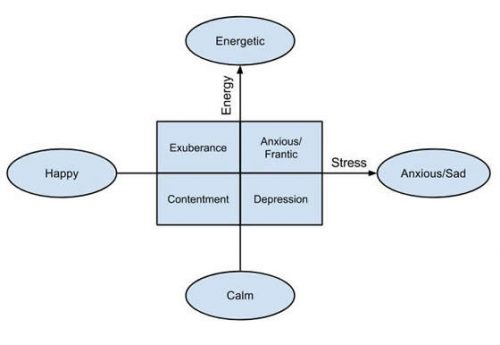

We therefore have four classifiers for our model. Now we need to get a dataset of songs with these different classifiers, as well as define the features needed from these songs to predict the mood. The best way we can do this is through the Spotify API. Given a trackID, we can extract audio features from a song.

In [136]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials
auth_manager = SpotifyClientCredentials(client_id='52547cdbf4554c3e8e5b6b1adb95b5a1', client_secret='b1d277808a8940b394619fd28158da4a')
s = sp.Spotify(auth_manager=auth_manager)

In [138]:
import pandas as pd

**1. Data Collection/Curation**

Each playlist title has a general mood attached to it (I.e. with a playlist titled “Happy Beats”, we can safely assume that the songs within the playlist are happy and can be labeled as such). Therefore to collect the data I’ve accumulated playlists from different Spotify-generated playlists that have a class keyword from Thayer’s model (Happy, Sad, Calm, Energetic). 

In [139]:
happy = ['37i9dQZF1DWSf2RDTDayIx', '37i9dQZF1DXdPec7aLTmlC', '37i9dQZF1DX8Dc28snyWrn', '37i9dQZF1DWYBO1MoTDhZI', '37i9dQZF1DX1uG5byNIgDA', '37i9dQZF1DX2sUQwD7tbmL'] #0
sad = ['37i9dQZF1DWZUAeYvs88zc', '37i9dQZF1DX7qK8ma5wgG1', '37i9dQZF1DX6xZZEgC9Ubl', '37i9dQZF1DX9AnYEthXLyU', '37i9dQZF1DWVxpHBekDUXK', '37i9dQZF1DWSqBruwoIXkA'] #1
calm = ['37i9dQZF1DXcr2UzLGERUU', '37i9dQZF1DX6VdMW310YC7', '37i9dQZF1DX5CdVP4rz81C', '37i9dQZF1DX0MLFaUdXnjA', '37i9dQZF1DX2yvmlOdMYzV', '37i9dQZF1DX6tTW0xDxScH'] #2
energetic = ['37i9dQZF1DX0vHZ8elq0UK', '37i9dQZF1DX35X4JNyBWtb', '37i9dQZF1DX66m4icL86Ru', '37i9dQZF1EIcVD7Tg8a0MY', '37i9dQZF1DWUyPpT6WoO7A', '37i9dQZF1EIeWkt2F5W0Tu'] #3

In [140]:
items = [happy, sad, calm, energetic]

Each value in the four different lists represent a PlaylistID, corresponding to a public playlist on Spotify. Given those IDs we can extract information about the playlist itself such as when it was created, how many songs, the author of it, as well as information about the specific songs within that playlist. You can actually see the playlists used in this project by typing in https://open.spotify.com/playlist/{PLAYLIST_ID}
The information extracted from each playlistID will be the Titles and TrackIDs of each song, and the associated class label is based off the title of the Playlist and something that isn't available with the Spotify API.

In [ ]:
df = pd.DataFrame(columns = ['Name', 'TrackID', 'Class'])
c = 0
for i in items: 
  for elem in i:
    new_playlist = s.playlist_items(playlist_id=elem)
    for i in range(0, len(new_playlist['items'])- 1):
      item = new_playlist['items'][i]['track']
      df = df.append({'Name' : item['name'], 'TrackID' : item['id'], 'Class' : c},
        ignore_index = True)
  c = c + 1


In [142]:
df

,Name,TrackID,Class
0,Cold Heart - PNAU Remix,6zSpb8dQRaw0M1dK8PBwQz,0
1,Words (feat. Zara Larsson),1bgKMxPQU7JIZEhNsM1vFs,0
2,Deep Down (feat. Never Dull),7MIhUdNJtaOnDmC5nBC1fb,0
3,B.O.T.A. (Baddest Of Them All) - Edit,39JofJHEtg8I4fSyo7Imft,0
4,21 Reasons (feat. Ella Henderson),1RF02Cf80mTaeNXG2P2boR,0
...,...,...,...
1926,Culture,1TM9Cr6zf1x5jhTnRbf4Y6,3
1927,Mutations,3HTrwdnNIFvVC9eipxm0KS,3
1928,San Celeste,1OiikbyMW84enPHUovWDiD,3
1929,Temple Of Null,37mUEcpOtA8VIJxDhPFe22,3


In [143]:
df.drop_duplicates(subset=['TrackID'], keep='first', inplace=True)

In [144]:
df.head()

,Name,TrackID,Class
0,Cold Heart - PNAU Remix,6zSpb8dQRaw0M1dK8PBwQz,0
1,Words (feat. Zara Larsson),1bgKMxPQU7JIZEhNsM1vFs,0
2,Deep Down (feat. Never Dull),7MIhUdNJtaOnDmC5nBC1fb,0
3,B.O.T.A. (Baddest Of Them All) - Edit,39JofJHEtg8I4fSyo7Imft,0
4,21 Reasons (feat. Ella Henderson),1RF02Cf80mTaeNXG2P2boR,0


Given a TrackID, we can extract different audio features of a song. For instance, with Cold Heart - PNAU Remix, the TrackID is 6zSpb8dQRaw0M1dK8PBwQz. With that ID, we can gain the following information:




In [145]:
s.audio_features(tracks={'6zSpb8dQRaw0M1dK8PBwQz'})

[{'danceability': 0.796,
  'energy': 0.798,
  'key': 1,
  'loudness': -6.312,
  'mode': 1,
  'speechiness': 0.0317,
  'acousticness': 0.034,
  'instrumentalness': 4.19e-05,
  'liveness': 0.0952,
  'valence': 0.942,
  'tempo': 116.032,
  'type': 'audio_features',
  'id': '6zSpb8dQRaw0M1dK8PBwQz',
  'uri': 'spotify:track:6zSpb8dQRaw0M1dK8PBwQz',
  'track_href': 'https://api.spotify.com/v1/tracks/6zSpb8dQRaw0M1dK8PBwQz',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6zSpb8dQRaw0M1dK8PBwQz',
  'duration_ms': 202735,
  'time_signature': 4}]

**Acousticness**

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**Danceabillity** 

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**Duration**

The duration of the track in milliseconds.

**Energy**

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**Instrumentalness**

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Key**

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**Liveness**

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**Loudness**

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**Mode**

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**Speechiness**

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**Tempo**

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Time_signature**

An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

**Valence**

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

https://developer.spotify.com/documentation/web-api/reference/get-audio-features

We will use these audio features to power the prediction of the mood of a song. Similarly to the API call for the song 'Cold Heart', the audio features from every trackID in the dataframe can be extracted. To limit the amount of API calls made, the dataframe will be separated by groups of 100, as that is the maximum amount of tracks that we can maximize the amount of features gained with only one call. 

In [146]:
import numpy as np

In [147]:
lst = list(df['TrackID']) 
features = []
p = [lst[i:i + 100] for i in range(0, len(lst), 100)] #list of lists(each sublist @ 100 values)

for i in range(0,len(p)):
    features.append(s.audio_features(tracks=p[i])) 
    
features = list(np.concatenate(features).flat) #flatten list afterwards

We will append the following features to the dataframe to complete the dataset needed for prediction:

In [148]:
duration = []
energy = []
key = []
loudness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
danceability = []
speechiness = []
acousticness = []
mode = []

There is a limited amount of tracks that do not have any audio features available. Since there are only three tracks that do not have those features in a dataset of 1700 songs, those can be dropped. For now if there is no available audio features, all of the feature values will be set to zero to preserve the length of list being the same as the dataframe. After adding the lists to the dataframe, we can drop all songs with the audio feature values equaling zero to make sure the data is clean.

In [149]:
from types import NoneType
for elem in features:
  if elem is None:
    duration.append(0)
    energy.append(0)
    key.append(0)
    loudness.append(0)
    instrumentalness.append(0)
    liveness.append(0)
    valence.append(0)
    tempo.append(0)
    danceability.append(0)
    speechiness.append(0)
    acousticness.append(0)
    mode.append(0)
    continue
  duration.append(elem['duration_ms'])
  energy.append(elem['energy'])
  key.append(elem['key'])
  loudness.append(elem['loudness'])
  instrumentalness.append(elem['instrumentalness'])
  liveness.append(elem['liveness'])
  valence.append(elem['valence'])
  tempo.append(elem['tempo'])
  danceability.append(elem['danceability'])
  speechiness.append(elem['speechiness'])
  acousticness.append(elem['acousticness'])
  mode.append(elem['mode'])

Now that we have individual lists that contain the feature values for each song, we add them as columns to the existing dataset, and delete any songs with zero in the rows

In [150]:
df['duration'] = duration
df['energy'] = energy
df['key'] = key
df['loudness'] = loudness
df['instrumentalness'] = instrumentalness
df['liveness'] = liveness
df['valence'] = valence
df['tempo'] = tempo
df['danceability'] = danceability
df['speechiness'] = speechiness
df['acousticness'] = acousticness
df['mode'] = mode
df = df[df['duration']!= 0]

And now we have the complete dataset:

In [151]:
df.head()

,Name,TrackID,Class,duration,energy,key,loudness,instrumentalness,liveness,valence,tempo,danceability,speechiness,acousticness,mode
0,Cold Heart - PNAU Remix,6zSpb8dQRaw0M1dK8PBwQz,0,202735,0.798,1,-6.312,0.000042,0.0952,0.942,116.032,0.796,0.0317,0.0340,1
1,Words (feat. Zara Larsson),1bgKMxPQU7JIZEhNsM1vFs,0,142677,0.586,10,-5.079,0.000252,0.3080,0.444,124.026,0.739,0.0472,0.0245,0
2,Deep Down (feat. Never Dull),7MIhUdNJtaOnDmC5nBC1fb,0,165753,0.818,0,-4.221,0.000000,0.2480,0.886,125.952,0.687,0.0778,0.0112,1
3,B.O.T.A. (Baddest Of Them All) - Edit,39JofJHEtg8I4fSyo7Imft,0,226627,0.906,0,-7.589,0.585000,0.1060,0.698,137.001,0.736,0.0480,0.1640,1
4,21 Reasons (feat. Ella Henderson),1RF02Cf80mTaeNXG2P2boR,0,155253,0.785,6,-4.499,0.000006,0.0512,0.779,123.960,0.621,0.1100,0.0165,1


**2. Exploratory Data Analysis**

Now that the dataset is complete and cleaned up, and contains the different features and classification, the data should be analyzed further to gain insights and understand their underlying patterns. From there we can formulate different hypotheses and see if different supervised classification approaches support it.

In [152]:
len(df)

1764

This is the total number of elements in our dataset. If we use the 70/30 test/train split this means that we will have 1235 elements used in our training set and 529 elements in our test set. When dividing each by four to indicate the approximate amount of each class present within a set, it would be approximately 308 values each with training and 132 values each for testing. One limit to these approximations is that it assumes that there is an equal amount of each class present in the dataset when that is not necessarily the case.

In [153]:
df['Class'].value_counts()

2    470
0    453
3    428
1    413
Name: Class, dtype: int64

The 0 class is a Happy song, class 1 is a sad song, class 2 is a calm song, and class 3 is an energetic song. It is important to note that while each class has over 400 songs, there is a significant difference present between the class with the most amount of songs (calm) and the class with the least amount of songs (happy). If these corresponding datasets perform the best and worst in classification algorithms, a potential cause could be due to the fact that with some algorithms, they can potentially be vulnerable to becoming biased towards the classes that have a majority in the dataset. It is important to keep this in mind and use some kind of class balancing such as class weights, sampling, or a specialized loss function such as cross-entropy.

To visualize the data, I will find the average value of each feature in a class to see if there are any possible correlations that can further inform what our hypothesis would be as far as what features are most important as well as whether the model would do well with predictions in the first place. To do this, a new dataframe should be created and each column should represent the averages for each class.

In [154]:
df2 = pd.DataFrame()

In [155]:
df2['happy_avg'] = df[df['Class'] == 0].mean()
df2['sad_avg'] = df[df['Class'] == 1].mean()
df2['calm_avg'] = df[df['Class'] == 2].mean()
df2['energy_avg'] = df[df['Class'] == 3].mean()

<ipython-input-155-880a96650364>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2['happy_avg'] = df[df['Class'] == 0].mean()
<ipython-input-155-880a96650364>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2['sad_avg'] = df[df['Class'] == 1].mean()
<ipython-input-155-880a96650364>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeri

In [156]:
df2.drop(['Class'], inplace=True)

In [157]:
df2

,happy_avg,sad_avg,calm_avg,energy_avg
duration,197352.783664,191665.016949,209421.676596,196492.457944
energy,0.733956,0.499167,0.469550,0.747685
key,5.260486,5.016949,5.272340,5.067757
loudness,-5.670614,-8.393344,-9.341606,-5.862512
instrumentalness,0.032702,0.019046,0.136016,0.100923
liveness,0.178078,0.166381,0.155923,0.183346
valence,0.586502,0.363672,0.368983,0.586343
tempo,123.081974,121.703397,117.265543,122.700778
danceability,0.657433,0.565755,0.593913,0.707000
speechiness,0.069277,0.075082,0.061074,0.101493


To better visualize and interpret the data I plotted the data as a bar graph. 

<Axes: >

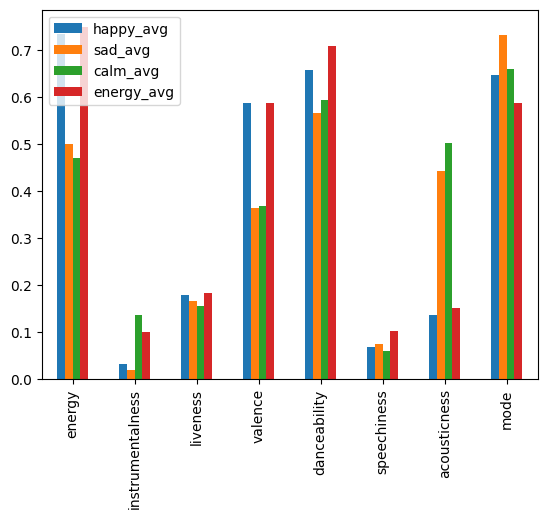

In [158]:
df2.drop(['duration', 'tempo', 'key', 'loudness']).plot.bar()

There are several features that stand out, such as energy, instrumentalness, acousticness, and valence. With energy, both songs that are classified as happy and energetic have on average higher levels of energy than songs that are classified as sad and calm. With instrumentalness, music that is classified as calm has the highest average which doesn't seem too surprising, as values that are over 0.5 indicate a completely instrumental track and values above that increase the confidence of that factor. At first it was surprising that songs that are classified as energetic have the second highest average whereas music that is classified as sad has the lowest average of instrumentalness. However when manually inspecting the sad songs, they do have the tendency of being quite lyrical which yields lower scores. The averages for valence aren't surprising, as a higher valence indicates a more positive sound (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative. Therefore with songs classified as happy and energetic having higher averages and songs that are classified as sad and calm having lower averages with sad having the lowest average is to be expected. Finally with acousticness the calm and sad classes have a higher average of acousticness than the energy and happy classes with songs being classified as calm having the highest level of acousticness.

With this it is likely that the features that yield the highest information gain are energy, instrumentalness, and acousticness. Furthermore it may also be likely that there will be low levels of precision with the model because there aren't that many significant differences on average between happy and energetic, and sad and calm. When energy, for instance, is noticably larger on average than calmness, hapiness would also be noticably larger and sadness would also be on that same level as calmness. 

**3. Decision Tree Classification**

A decision tree classifier is a supervised machine learning algorithm that is used for classification tasks. It builds a model by recursively partitioning the training data based on features. When the splitting ends, the final nodes of the decision tree represents a class label. We will use this model to predict the classification nof a song.

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn import tree
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

We set our X dataframe with our desired features. We would like to keep everything except the name, trackID, and class which we are trying to predict. The class is set as y. 

In [160]:
X = df.drop(columns=['Name', 'TrackID', 'Class'])
y = df['Class']
y=y.astype('int')

We then split the dataset into a test and train datasets with the standard 70/30 split. The randon_state will be set at the standard 42 as well so that results are reproducible. 

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

We then build our decision tree models. Below are two different models with mostly similar hyperparameters except for the criterion. The different criterion are indicate the commonly used criteria for measuring the impurity or disorder of a node in a decision tree and help determine the best split during the construction of the decision tree. We will use the same underlying training data to train the model.

In [162]:
gini_tree = DecisionTreeClassifier(criterion="gini", max_depth=3).fit(X_train,y_train)
ent_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3).fit(X_train,y_train)

We then output the predicted values to y_gin_predict and y_ent_predict and compare the predictions against y_train 

In [163]:
y_gin_predict = gini_tree.predict(X_train)
y_ent_predict = ent_tree.predict(X_train)

Here is the classification report for the gini splits on the training:

In [164]:
print(classification_report(y_train,y_gin_predict))

              precision    recall  f1-score   support

           0       0.49      0.55      0.52       321
           1       0.50      0.52      0.51       287
           2       0.69      0.57      0.63       341
           3       0.53      0.53      0.53       285

    accuracy                           0.55      1234
   macro avg       0.55      0.55      0.55      1234
weighted avg       0.56      0.55      0.55      1234



We then use the model for the test set:

In [165]:
y_gin_test_predict = gini_tree.predict(X_test)
print(classification_report(y_test, y_gin_test_predict))

              precision    recall  f1-score   support

           0       0.45      0.51      0.48       132
           1       0.57      0.60      0.58       126
           2       0.57      0.50      0.53       129
           3       0.57      0.53      0.55       143

    accuracy                           0.54       530
   macro avg       0.54      0.54      0.54       530
weighted avg       0.54      0.54      0.54       530



The accuracy is pretty low at 54% for the training set and 53% for the test set. Both are quite low. The model performs the worst when classifying happy songs as the f1 scores are 51% and 46% respectively for the training and test sets and the f1 scores for the other classes are either the same or higher. The recall scores also on the lower end, as it suggests that the proportion of actual correct classifications identified correctly is low. With these results its clear that the hyperparameters need to be tuned or another model needs to be used. 

Before doing that, let's analyze the decision tree to see which features were used for the splits:

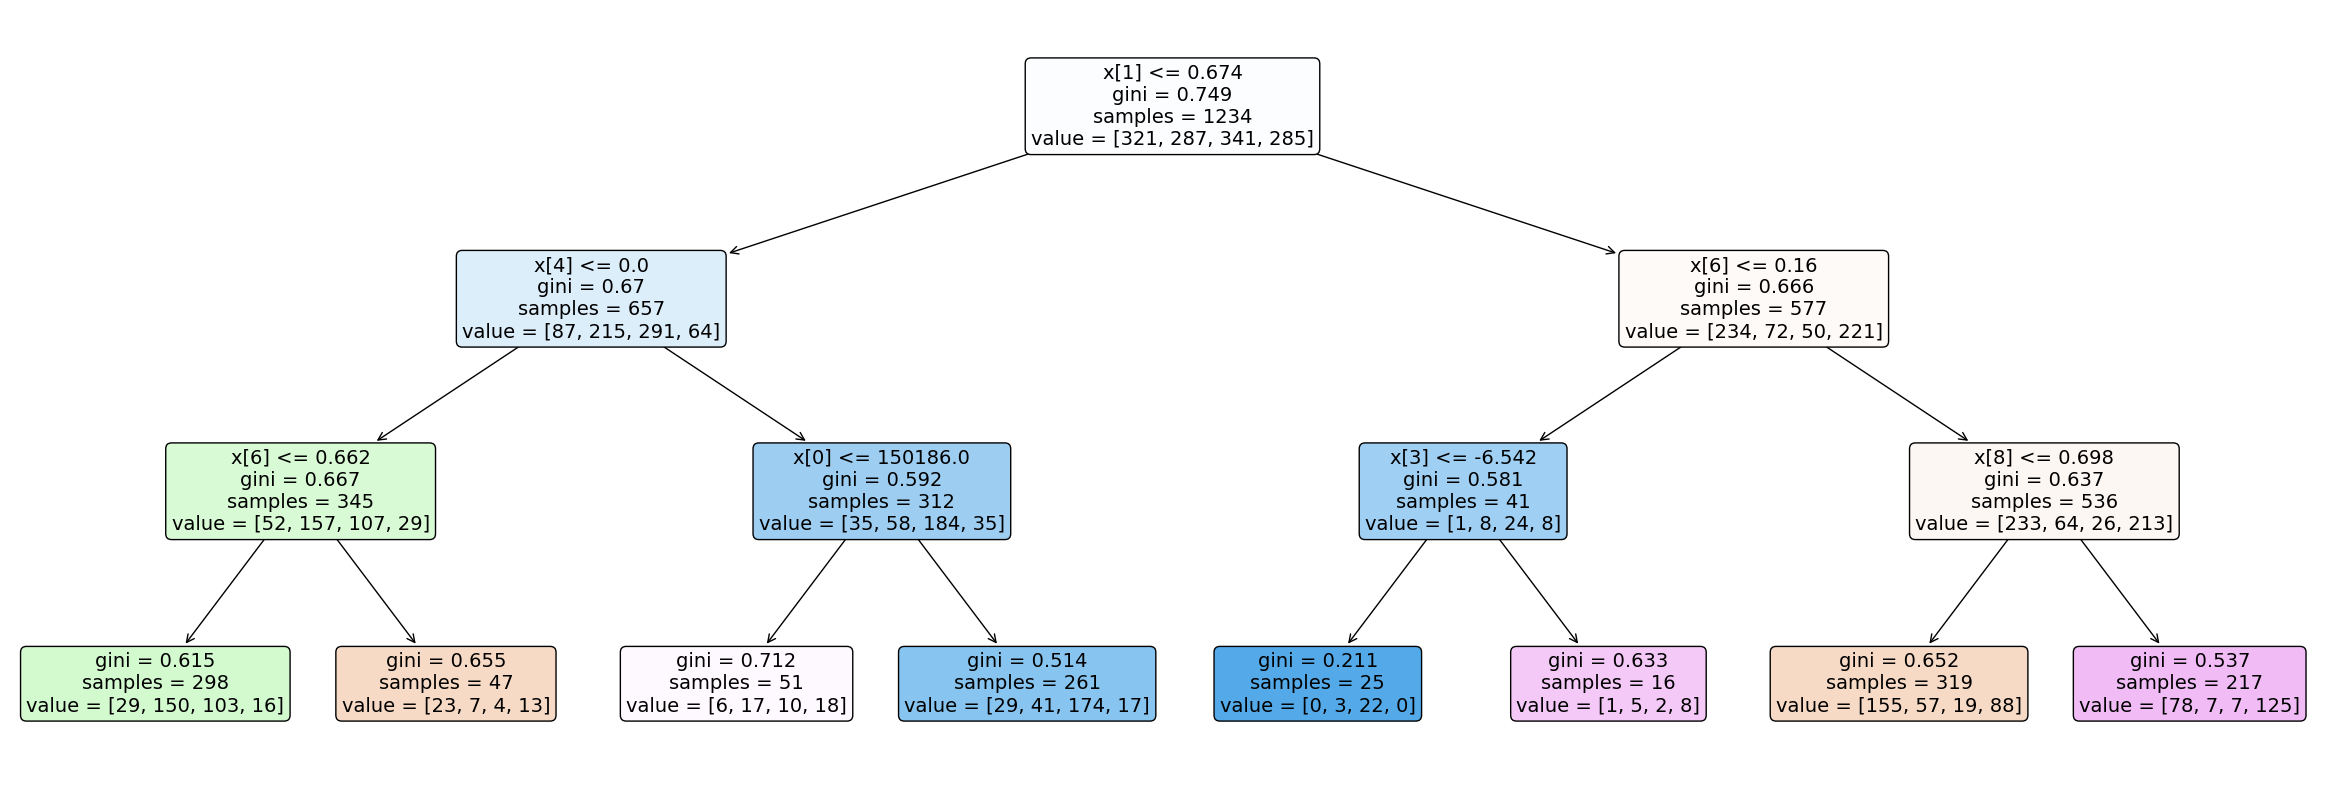

In [166]:
plt.figure (figsize= (30,10))
a = tree.plot_tree(gini_tree, filled=True, rounded=True, fontsize=14)
plt.savefig( "decisiontree-gini.png")

In [167]:
X.head(1)

,duration,energy,key,loudness,instrumentalness,liveness,valence,tempo,danceability,speechiness,acousticness,mode
0,202735,0.798,1,-6.312,0.000042,0.0952,0.942,116.032,0.796,0.0317,0.034,1


At the root of the node is X[1], making energy the root of the node. Its two children are X[4], instrumentalness, and X[6], valence. The other features used are X[8], danceability and X[0], duration. The only node which seems surprising is the duration, as it seems challenging to correlate that with the mood of the song. It is also surprising that accousticness doesn't appear on the tree as that also seemed to be a feature that is important. 

Here is the classification report for the entropy splits on the training dataset: 

In [168]:
print(classification_report(y_train,y_ent_predict))

              precision    recall  f1-score   support

           0       0.49      0.43      0.45       321
           1       0.38      0.26      0.31       287
           2       0.56      0.81      0.66       341
           3       0.55      0.51      0.53       285

    accuracy                           0.51      1234
   macro avg       0.50      0.50      0.49      1234
weighted avg       0.50      0.51      0.50      1234



In [169]:
y_ent_test_predict = gini_tree.predict(X_test)
print(classification_report(y_test,y_ent_test_predict))

              precision    recall  f1-score   support

           0       0.45      0.51      0.48       132
           1       0.57      0.60      0.58       126
           2       0.57      0.50      0.53       129
           3       0.57      0.53      0.55       143

    accuracy                           0.54       530
   macro avg       0.54      0.54      0.54       530
weighted avg       0.54      0.54      0.54       530



The accuracy with entropy is also pretty low at 51% for the training set and yields the same accuracy for the test set at 53%. Both are quite low. The model also performs the worst when classifying happy songs as the f1 scores are 50% and 46% respectively for the training and test sets. The classification tables overall yield the same values, meaning that there really isn't a significant difference when using either one. If one had to choose a hyperparameter it would be better to use the gini index, as it yields the same results but is slightly more computationally efficient.

**4. Random Forest Model**

Another model that we'll be trying is the random forest model, using the same underlying data. It combines multiple decision trees to make predictions. While a single decision tree would form a standalone model, a random forest builds a collection of decision trees and aggregates their predictions to produce a final prediction. Random forests tend to have better generalization performance compared to individual decision trees, which are prone to overfitting, noise, and variance. Due to this it can improve the accuracy of the existing decision tree model. We will use the same max_depth of 3 and random_state of 42.

In [170]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=42).fit(X_train, y_train)

In [171]:
y_clf_train = clf.predict(X_train)

In [172]:
print(classification_report(y_train,y_clf_train))

              precision    recall  f1-score   support

           0       0.51      0.67      0.58       321
           1       0.60      0.30      0.40       287
           2       0.58      0.85      0.69       341
           3       0.71      0.43      0.54       285

    accuracy                           0.58      1234
   macro avg       0.60      0.56      0.55      1234
weighted avg       0.60      0.58      0.56      1234



With the training data, the randomized forest performs better with the random forest model with an accuracy of 59%. Class 0, a happy song classification which was the worst at being classified with the decision tree model has a far better f1-score with of 60% with the random forest model. In addition classes 0 and 2 have higher f1 scores than both decision tree models.

In [173]:
y_clf_test = clf.predict(X_test)

In [174]:
print(classification_report(y_test,y_clf_test))

              precision    recall  f1-score   support

           0       0.44      0.61      0.51       132
           1       0.61      0.30      0.40       126
           2       0.47      0.78      0.59       129
           3       0.65      0.34      0.44       143

    accuracy                           0.50       530
   macro avg       0.54      0.50      0.49       530
weighted avg       0.54      0.50      0.49       530



When testing the random forest model against the test set, it performs slightly worse than the decision model. To verify this case, I will perform cross validation with both of the decision trees and random forest. This involves dividing the available data into multiple subsets and iteratively training and evaluating the model on different combinations of these subsets.

In [175]:
from sklearn.model_selection import cross_val_score
import statistics

Scores with Random Forest:

In [176]:
score = cross_val_score(clf, X, y, cv=10)
print(score)
print(statistics.median(score)) #median

[0.46892655 0.44067797 0.49152542 0.42937853 0.36931818 0.35795455
 0.44886364 0.55113636 0.57954545 0.48863636]
0.4588950950179764


Scores with Gini Decision Tree:

In [177]:
score = cross_val_score(gini_tree, X, y, cv=10)
print(score)
print(statistics.median(score)) #median

[0.42937853 0.55367232 0.50847458 0.42937853 0.375      0.34659091
 0.38636364 0.58522727 0.66477273 0.5625    ]
0.4689265536723164


Scores with Entropy Decision Tree:

In [178]:
score = cross_val_score(ent_tree, X, y, cv=10)
print(score)
print(statistics.median(score)) #median

[0.38418079 0.48022599 0.35028249 0.39548023 0.35795455 0.36931818
 0.42613636 0.53409091 0.59659091 0.48295455]
0.4108082948125321


While in the classification chart the accuracy is lower, the median of the cross validation scores are higher, suggesting that the Random Forest model is still a better option. 

**5. Conclusion and Future Work**

Overall with the different song classification models built, the accuracy rate isn't very high. While accuracy rates hovering around 50% sounds terrible, as with binary classification it is no different than random selection, there are four different classes. If the classification model were choosing randomly then the accuracy rates would be around 25%. Therefore a 50% accuracy rate with four classes suggest that there can still be some valuable insights from the model, such as knowing the features that were used with partitioning the training data. In addition, there is a high level of subjectivity when it comes to the mood of a song, as what one individual may consider to be a happy song may not be the case for another individual. For instance the reason for exclusively using Spotify-generated playlists is due for consistency in the data compared to users, but even the playlists change on a weekly basis and they are sometimes generated by external users. For future work there can be several things that can be done to improve:

  1. Try other models such as SVMs and Neural Networks
  2. Add more classifications to decrease the amount of overlap
  3. Even out the dataset by adding more happy and energetic songs